In [2]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d, interpolate_background
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib notebook

In [3]:
x, y, z, T, t, settings = load_data("four_4")
x = x[0]
y = y[0]
settings = settings[0]
print(len(z))
settings

6


{'change_direction': True,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((26.5, 42.5, 0.1), (20, 36, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

In [6]:
x_bg, y_bg, z_bg, _, _, _ = load_data("background_anschlag")
x_bg = x_bg[0]
y_bg = y_bg[0]
z_bg = z_bg[0][0]
background = interpolate_background(x_bg, y_bg, z_bg, x, y)

In [78]:
zz = np.concatenate(z)
noise_std = detrend2D(np.std(zz, axis=0))

<IPython.core.display.Javascript object>


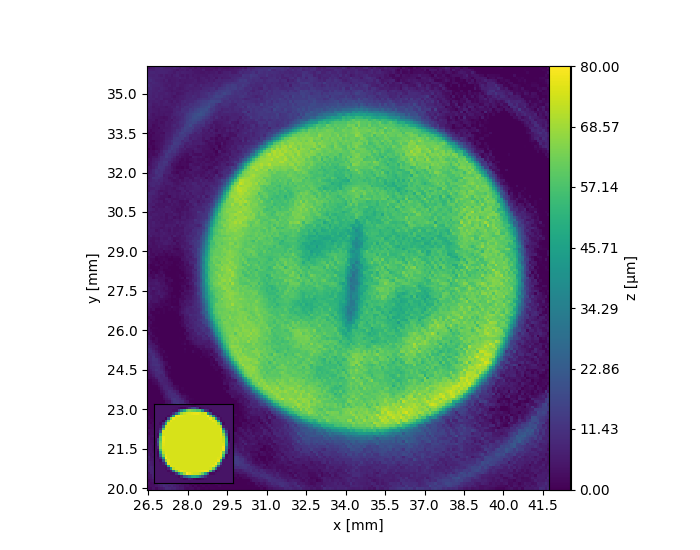

In [111]:
#plot(x, y, background)

sensor = z[1][0]
signal = background - sensor
signal = detrend2D(signal)
signal -= signal.min() + 5


#noise = z[1][0] - z[-1][0]
#noise = detrend2D(noise)
#noise2 = noise.copy()
#np.random.shuffle(noise.flat)

limits = (0, 80)

#plot(x, y, signal, limits=limits)
#plot(x, y, noise_std)
#plot(x, y, 0.5 * (noise + noise2))


diameter = 2.57
sigma = 0
factor = 1
theta=0
phi=9
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma, theta=theta, phi=phi, z0=factor * sensor.mean()/1000/stepsize)
z_reconstructed = wiener(signal, kernel, noise_std * 0.01, 1, extra=6)

#z_reconstructed = ndi.filters.median_filter(z_reconstructed, 3)

#fig, ax = plot(x, y, z_reconstructed)
fig, ax = plot(x, y, z_reconstructed, limits=limits, psf=kernel)
#profile = ProfileBuilder(fig, ax)